In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as stats

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
az.style.use('arviz-white')

## Coal mining disasters

For this model we may use NUTS as a "gold-standard"

In [3]:
disaster_data = pd.Series([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                           3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                           2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3,
                           0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1,
                           1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1,
                           0, 2, 3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2,
                           0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
                           1, 0, 1])

years = np.arange(1851, 1962)

In [4]:
with pm.Model() as mining:
    # Prior for the switch-point 
    sp = pm.DiscreteUniform('sp', lower=years.min(), upper=years.max())

    # Priors for the rate before (t_0) and after (t_1)
    t_0 = pm.Exponential('t_0', 1)
    t_1 = pm.Exponential('t_1', 1)

    # We assign the rate according to the sp,
    rate = pm.Deterministic("rate", pm.math.switch(sp >= years, t_0, t_1))

    # Likelihood
    acc = pm.Poisson('acc', rate, observed=disaster_data)
    
    # We compute the posterior
    idata_smc  = pm.sample_smc(chains=4)
    idata_nuts = pm.sample(chains=4)

/home/pablo/anaconda3/envs/smc/lib/python3.9/site-packages/pymc/model.py:1379: RuntimeWarning: invalid value encountered in cast
  data = convert_observed_data(data).astype(rv_var.dtype)
/home/pablo/anaconda3/envs/smc/lib/python3.9/site-packages/pymc/model.py:1402: ImputationWarning: Data in acc contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Initializing SMC sampler...
Sampling 4 chains in 3 jobs


Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [sp]
>>Metropolis: [acc_missing]
>NUTS: [t_0, t_1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [5]:
idata_smc.sample_stats._t_sampling

8.029447078704834

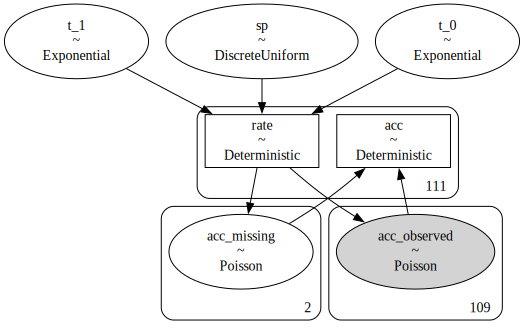

In [6]:
pm.model_to_graphviz(mining)

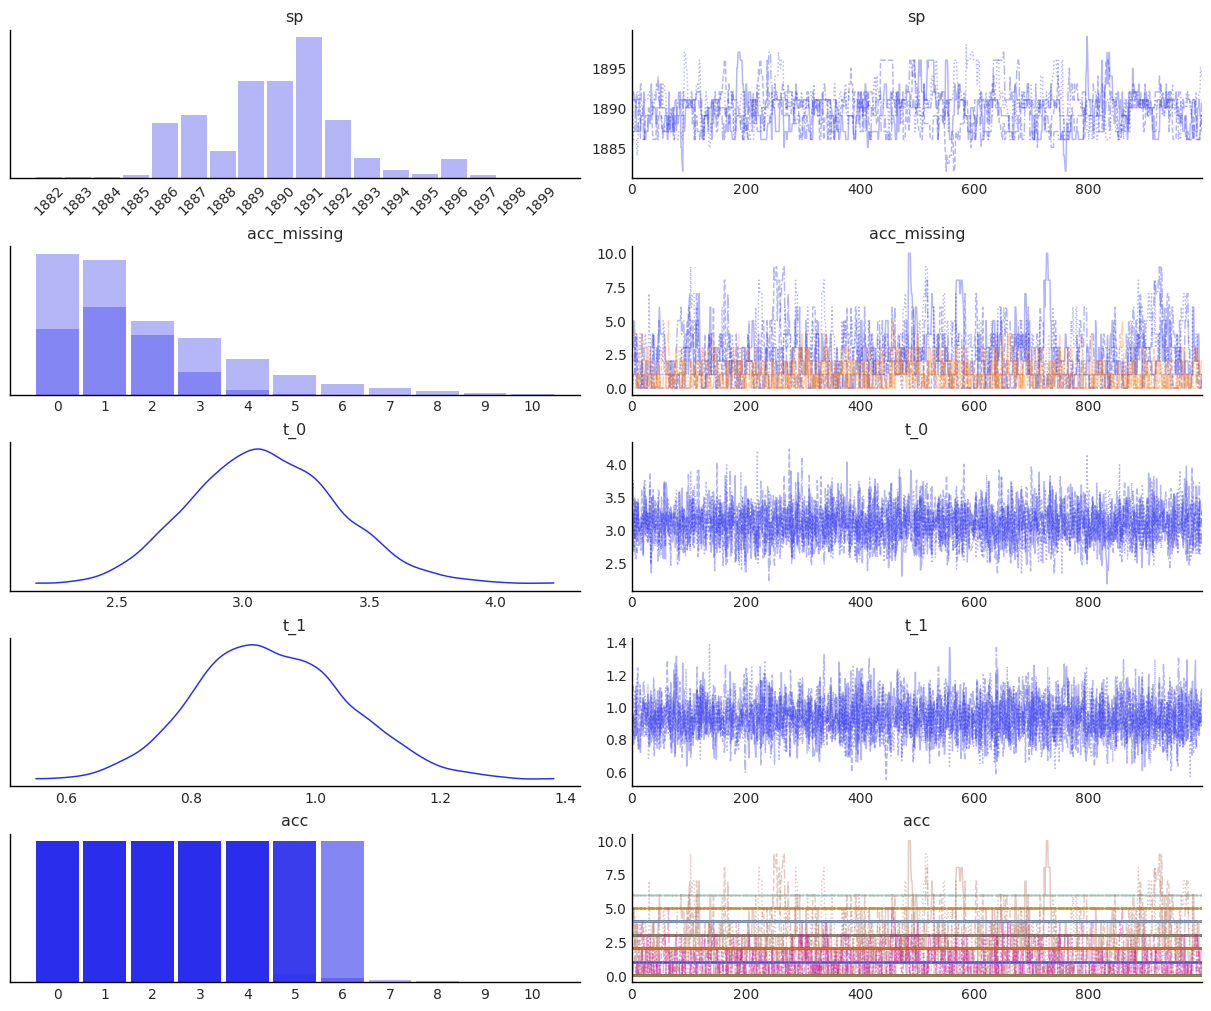

In [7]:
ax = az.plot_trace(idata_nuts, var_names=["~rate"], combined=True)
[ticks.set_rotation(45) for ticks in ax[0, 0].get_xticklabels()];

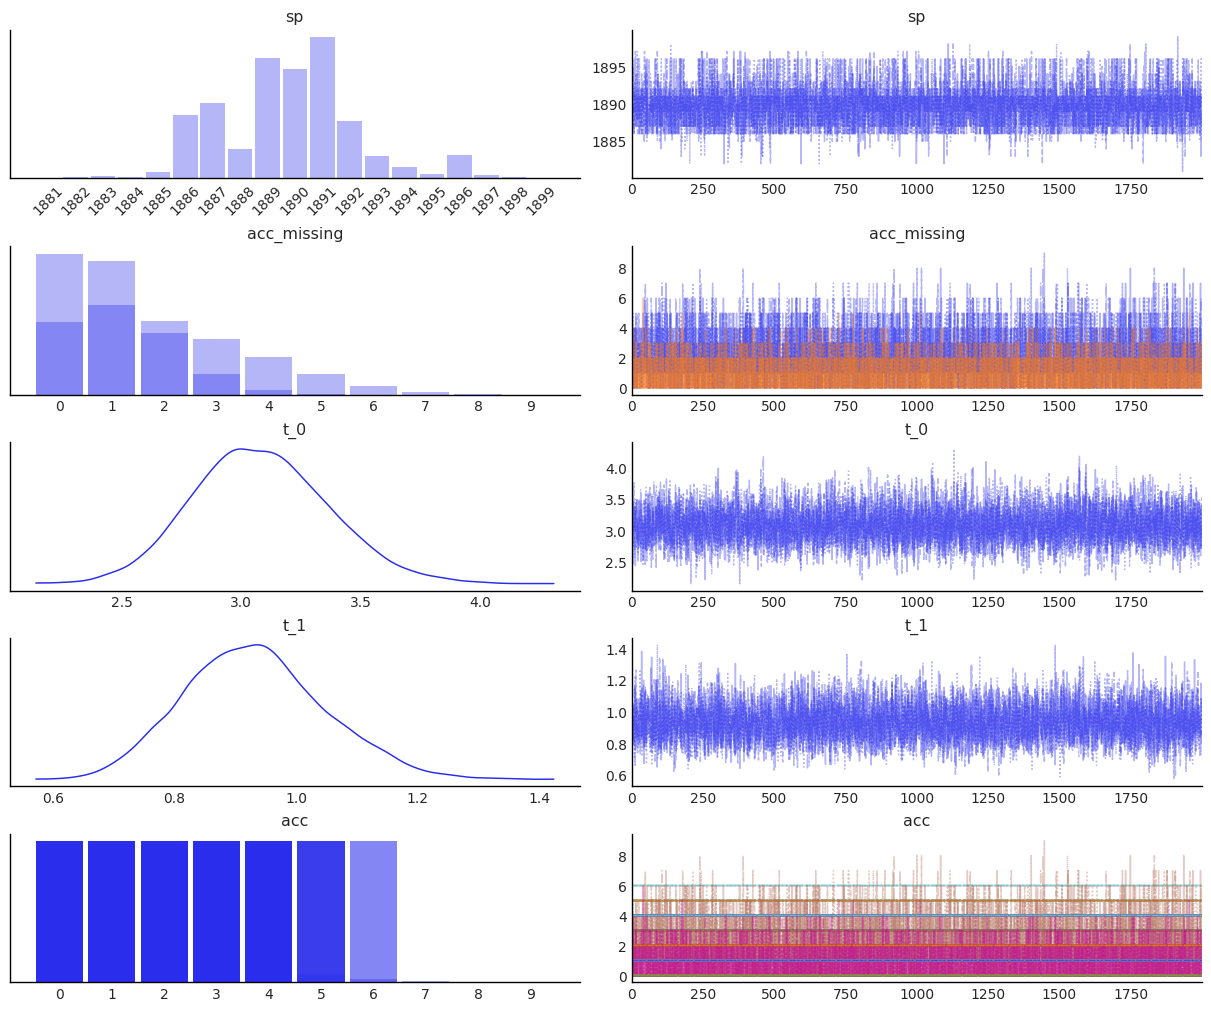

In [8]:
ax = az.plot_trace(idata_smc, var_names=["~rate"], combined=True)
[ticks.set_rotation(45) for ticks in ax[0, 0].get_xticklabels()];